In [32]:
import matplotlib.pyplot as plt
import numpy as np
import shelve
import h5py
import glob
import astropy
from astropy.table import Table as Table
def plot(x, y, ret=False):
    a=plt.plot(x, y)
    plt.show()
    if ret: return a

In [17]:
fnamelist = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/*METACAL*')

tiles = []
for fname in fnamelist:
    tiles.append(fname.split('_')[-1].split('.')[0])

In [20]:
tiles = np.unique(tiles)

In [22]:
tile=tiles[0]

In [23]:
tile

'DES1156-3706'

## Single Tile

In [27]:
# opening probs files
path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_METACAL4_probs_{tile}'
probs = shelve.open(path)

# opening samples files
path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_METACAL4_{tile}_ITS.txt'
samples = np.loadtxt(path)

#BPZ h5 file
filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_METACAL4_{tile}.h5'
with h5py.File(filename) as f:
    bpzres={}
    for key in list(f.keys()):
        bpzres[key] = np.array(f[key])

IDs=list(probs.keys())[2:]

zs = probs[IDs[0]][0]

pdftotal = np.zeros_like(zs)
length = len(IDs)

for i, ID in enumerate(IDs):
    if i%1000==0: print(i, 'out of', length)
    template = int(bpzres['T_ML'][i]-1)
    pdf = probs[ID][2][:,template]
    norm = np.sum(pdf)
    #print(norm)
    pdf /= norm
    pdftotal += pdf

0 out of 1603
1000 out of 1603


In [ ]:
#opening catalog file


## Stacked Tiles

In [29]:
#probs[]

path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_METACAL4_probs_{tile}'
probs = shelve.open(path)
IDs=list(probs.keys())[2:]

In [30]:
tile = tiles[11]
path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_METACAL4_probs_{tile}'
probs = shelve.open(path)
IDs=list(probs.keys())[2:]
zs = probs[IDs[0]][0]

PDF = pdftotal = np.zeros_like(zs)
all_samples = np.array([])

for tile in tiles[:20]:
    # opening probs files
    path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/probs/pz_METACAL4_probs_{tile}'
    probs = shelve.open(path)

    # opening samples files
    path = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_METACAL4_{tile}_ITS.txt'
    samples = np.loadtxt(path)
    all_samples = np.concatenate((all_samples, samples))
    
    #BPZ h5 file
    filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_METACAL4_{tile}.h5'
    with h5py.File(filename) as f:
        bpzres={}
        for key in list(f.keys()):
            bpzres[key] = np.array(f[key])

    IDs=list(probs.keys())[2:]

    zs = probs[IDs[0]][0]

    pdftotal = np.zeros_like(zs)
    length = len(IDs)

    for i, ID in enumerate(IDs):
        if i%1000==0: print(i, 'out of', length)
        template = int(bpzres['T_ML'][i]-1)
        pdf = probs[ID][2][:,template]
        norm = np.sum(pdf)
        #print(norm)
        pdf /= norm
        pdftotal += pdf
    
    PDF += pdftotal

0 out of 1603
1000 out of 1603
0 out of 4857
1000 out of 4857
2000 out of 4857
3000 out of 4857
4000 out of 4857
0 out of 3502
1000 out of 3502
2000 out of 3502
3000 out of 3502
0 out of 2846
1000 out of 2846
2000 out of 2846
0 out of 5208
1000 out of 5208
2000 out of 5208
3000 out of 5208
4000 out of 5208
5000 out of 5208
0 out of 5469
1000 out of 5469
2000 out of 5469
3000 out of 5469
4000 out of 5469
5000 out of 5469
0 out of 1595
1000 out of 1595
0 out of 6342
1000 out of 6342
2000 out of 6342
3000 out of 6342
4000 out of 6342
5000 out of 6342
6000 out of 6342
0 out of 7505
1000 out of 7505
2000 out of 7505
3000 out of 7505
4000 out of 7505
5000 out of 7505
6000 out of 7505
7000 out of 7505
0 out of 7352
1000 out of 7352
2000 out of 7352
3000 out of 7352
4000 out of 7352
5000 out of 7352
6000 out of 7352
7000 out of 7352
0 out of 7107
1000 out of 7107
2000 out of 7107
3000 out of 7107
4000 out of 7107
5000 out of 7107
6000 out of 7107
7000 out of 7107
0 out of 7734
1000 out of 7734

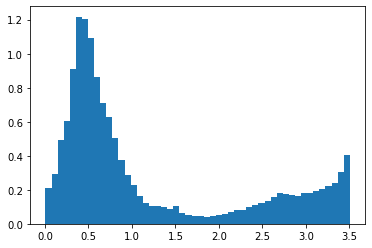

In [35]:
a = plt.hist(all_samples[all_samples>-1000], density=True, bins=50)

In [36]:
scale1 = PDF.max()
scale2 = a[0].max()

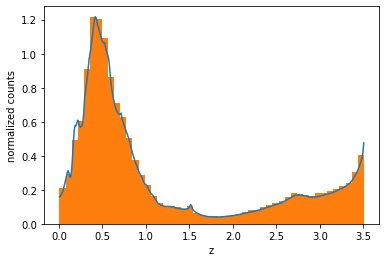

In [37]:
#PDF/=np.sum(PDF)
plt.xlabel('z')
plt.ylabel('normalized counts')
plt.plot(zs, scale2*PDF/scale1)
a = plt.hist(all_samples[all_samples>-1000], density=True, bins=50)
plt.show()

#do for loop for all tiles calculated

In [39]:
# loading catalog
mcal_full_data = Table.read('/home/raulteixeira/scratch-midway2/CosmicShearData/METACALgals.fits')

In [67]:
# loading BPZ results

for tile in tiles:
    filename = f'/home/raulteixeira/scratch-midway2/CosmicShearData/bpztiles/output/pzs/pz_METACAL4_{tile}.h5'
    with h5py.File(filename) as f:
        bpzres={}
        for key in list(f.keys()):
            bpzres[key] = np.array(f[key])

In [45]:
all_samples.size

116561

In [58]:
btiles = []
for tile in tiles:
    btiles.append(bytes(tile, encoding='utf-8'))

In [59]:
mcal_df = mcal_full_data.to_pandas()

In [60]:
mcal_df = mcal_df.loc[mcal_df['TILENAME'].isin(btiles)] #this ensures ordering by tiles as well!

In [65]:
mcal_df['SAMPLED_Z']=all_samples

In [69]:
g, r, i, z = mcal_df['MAG_AUTO_G'], mcal_df['MAG_AUTO_R'], mcal_df['MAG_AUTO_I'], mcal_df['MAG_AUTO_Z']

In [99]:
crazymask_gr = np.logical_or(g-r>4, g-r<-1)
crazymask_ri = np.logical_or(i-z>4, i-z<-1)
crazymask_iz = np.logical_or(r-i>4, r-i<-1)

crazymask = np.logical_not(np.logical_or(np.logical_or(crazymask_gr, crazymask_ri), crazymask_iz)) # masking out crazy colors

In [101]:
all_samples[crazymask].size

115492

In [127]:
len(all_samples[crazymask][all_samples[crazymask]>-1000][mcal_df[crazymask][all_samples[crazymask]>-1000]['MAG_AUTO_G']<30])

113749

(array([1663., 2351., 3907., 4822., 7264., 9690., 9593., 8695., 6902.,
        5642., 5006., 3992., 2983., 2260., 1820., 1308.,  967.,  856.,
         844.,  805.,  700.,  813.,  511.,  424.,  364.,  340.,  325.,
         364.,  417.,  480.,  550.,  633.,  654.,  782.,  889.,  990.,
        1091., 1266., 1435., 1384., 1336., 1285., 1425., 1427., 1543.,
        1618., 1760., 1927., 2429., 3217.]),
 array([0.0050424 , 0.07504144, 0.14504047, 0.21503951, 0.28503855,
        0.35503759, 0.42503663, 0.49503566, 0.5650347 , 0.63503374,
        0.70503278, 0.77503182, 0.84503085, 0.91502989, 0.98502893,
        1.05502797, 1.125027  , 1.19502604, 1.26502508, 1.33502412,
        1.40502316, 1.47502219, 1.54502123, 1.61502027, 1.68501931,
        1.75501835, 1.82501738, 1.89501642, 1.96501546, 2.0350145 ,
        2.10501354, 2.17501257, 2.24501161, 2.31501065, 2.38500969,
        2.45500872, 2.52500776, 2.5950068 , 2.66500584, 2.73500488,
        2.80500391, 2.87500295, 2.94500199, 3.01500103, 

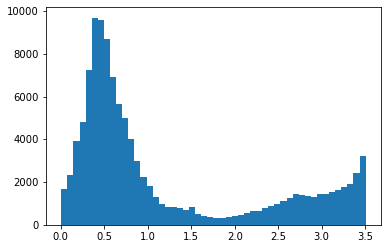

In [141]:
plt.hist(all_samples[crazymask][all_samples[crazymask]>-1000], bins=50)

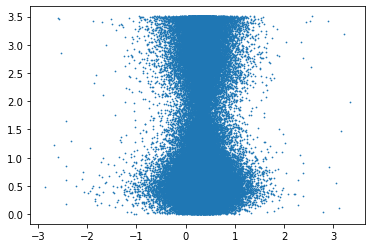

In [95]:
plt.scatter((i-z)[all_samples>-1000], all_samples[all_samples>-1000], s=.5)

In [142]:
far_z = mcal_df['SAMPLED_Z']>2.5

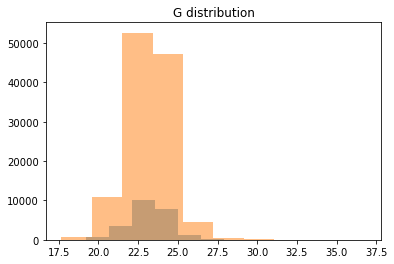

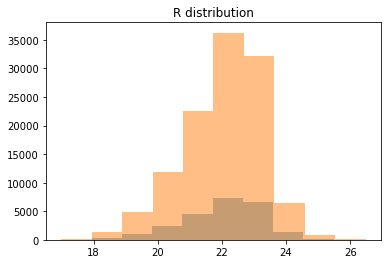

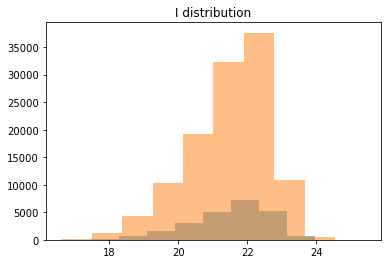

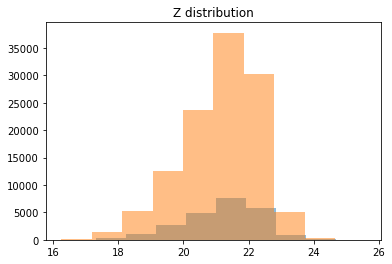

In [152]:
bandlist = ['G', 'R', 'I', 'Z']
for band in bandlist:
    plt.title(band+' distribution')
    plt.hist(mcal_df[f'MAG_AUTO_{band}'][far_z], alpha=.5)
    plt.hist(mcal_df[f'MAG_AUTO_{band}'], alpha=.5)
    plt.show()

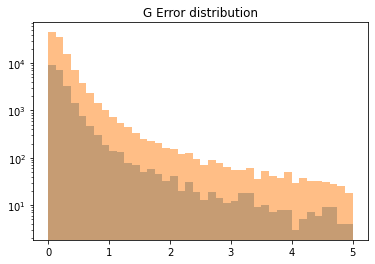

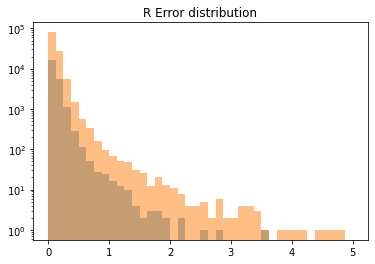

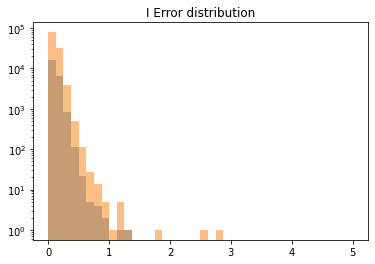

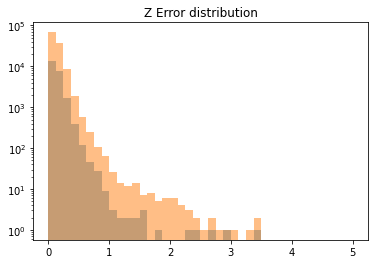

In [158]:
bandlist = ['G', 'R', 'I', 'Z']
for band in bandlist:
    plt.title(band+ ' Error'+' distribution')
    plt.yscale('log')
    plt.hist(mcal_df[f'MAGERR_AUTO_{band}'][far_z], alpha=.5, range=(0,5), bins=40)
    plt.hist(mcal_df[f'MAGERR_AUTO_{band}'], alpha=.5, range=(0,5), bins=40)
    plt.show()

In [ ]:
MAGERR_AUTO < 0.01 and MAG_AUTO - SOF_CM_MAG < -0.5 

In [138]:
mcal_df['SOF']

,COADD_OBJECT_ID,RA,DEC,BDF_MAG_G,BDF_MAG_R,BDF_MAG_I,BDF_MAG_Z,BDF_MAG_ERR_G,BDF_MAG_ERR_R,BDF_MAG_ERR_I,...,FLAGS_R,FLAGS_I,FLAGS_Z,FLAGS,IMAFLAGS_ISO_G,IMAFLAGS_ISO_R,IMAFLAGS_ISO_I,IMAFLAGS_ISO_Z,TILENAME,SAMPLED_Z
17244,6852810517,180.056895,-37.125468,24.569111,22.448962,23.842718,22.198615,0.332724,0.133007,0.216523,...,3,3,3,0,0,0,0,0,b'DES1159-3706',0.472759
17245,6852810535,180.206793,-37.125413,22.778549,22.026481,22.361128,21.980008,0.101843,0.095023,0.088954,...,2,2,2,0,0,0,0,0,b'DES1159-3706',2.825538
17246,6853208739,181.559452,-35.913658,24.529692,23.150590,23.807729,22.675550,0.271697,0.141387,0.172992,...,0,0,0,0,0,0,0,0,b'DES1205-3540',-1009.000000
17247,6853208937,181.520438,-35.919156,21.575862,19.107857,19.734226,18.758474,0.032845,0.012434,0.014082,...,3,3,3,0,0,0,0,0,b'DES1205-3540',1.541105
17248,6853209117,181.687098,-35.917839,23.007199,21.521029,21.808017,21.312273,0.095594,0.045378,0.052401,...,0,0,0,0,0,0,0,0,b'DES1205-3540',1.595687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908911,6853942915,180.943114,-40.304276,23.414859,22.770127,23.348938,22.611646,0.170868,0.172556,0.258668,...,0,0,0,0,0,0,0,0,b'DES1205-3957',3.087508
1908912,6853943130,180.971626,-40.308383,19.838072,18.774441,19.030330,18.628995,0.006745,0.006157,0.004459,...,0,0,0,0,0,0,0,0,b'DES1205-3957',0.254166
1908913,6853943430,181.020369,-40.315412,20.068654,18.725403,19.187515,18.501639,0.008311,0.006793,0.005085,...,2,2,2,0,0,0,0,0,b'DES1205-3957',-1010.000000
1908977,6853943792,181.631899,-40.314132,22.604909,22.009369,22.164659,21.836748,0.062262,0.083264,0.045277,...,0,0,0,0,0,0,0,0,b'DES1205-3957',1.923924


/software/python-anaconda-2020.02-el7-x86_64/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


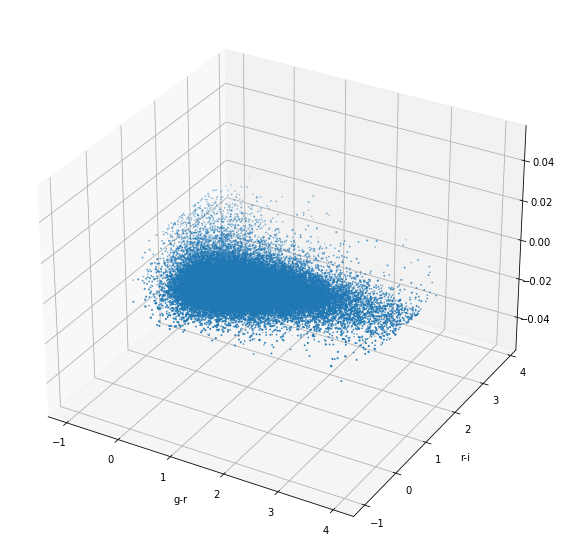

In [133]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.scatter((g-r)[crazymask][mcal_df['MAG_AUTO_G']<30], (r-i)[crazymask][mcal_df['MAG_AUTO_G']<30], (i-z)[crazymask][mcal_df['MAG_AUTO_G']<30], marker='o')

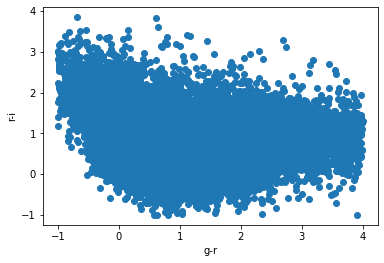

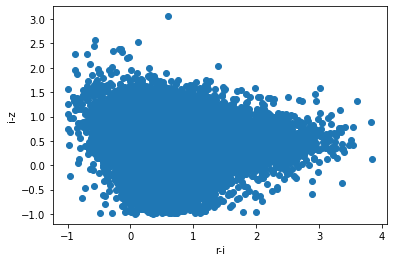

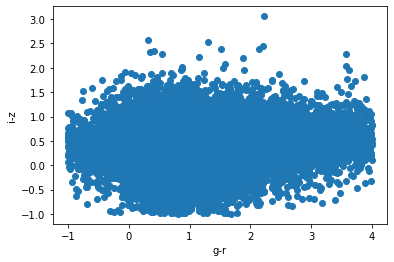

In [137]:
plt.xlabel('g-r')
plt.ylabel('r-i')
plt.scatter((g-r)[crazymask][mcal_df['MAG_AUTO_G']<30], (r-i)[crazymask][mcal_df['MAG_AUTO_G']<30])
plt.show()
plt.xlabel('r-i')
plt.ylabel('i-z')
plt.scatter((r-i)[crazymask][mcal_df['MAG_AUTO_G']<30], (i-z)[crazymask][mcal_df['MAG_AUTO_G']<30])
plt.show()
plt.xlabel('g-r')
plt.ylabel('i-z')
plt.scatter((g-r)[crazymask][mcal_df['MAG_AUTO_G']<30],(i-z)[crazymask][mcal_df['MAG_AUTO_G']<30])
plt.show()